# Lending Club Case Study Assignment

## <font color=green>Analyzed by Adhithia R and Karan S

## <font color=red>1. Importing Libraries

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import chardet    
from datetime import datetime
import plotly.express as px

## <font color=red>2. Identifying the Encoding of the csv file

In [133]:
rawdata = open("loan.csv", 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
charenc

'utf-8'

### <font color=green>2.1 Observation

-  <font color=blue>It was observed that the encoding of the file was 'utf-8'.</font>

## <font color=red>3. Reading the loan dataset

In [134]:
loan_df=pd.read_csv("loan.csv",encoding='utf-8')

### 3.1 Understanding the dataset

In [135]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [136]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### <font color=green>3.1.1 Observation

-  <font color=blue>There are 111 columns and 39717 rows.
-  There are 74 float columns and 13 integer columns.</font>

### 3.2 Understanding the ***Null*** Values

In [137]:
pd.set_option('display.max_rows', 500)
loan_df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [138]:
round(100*(loan_df.isnull().sum()/len(loan_df.index)),2).sort_values(ascending=False)

total_il_high_credit_limit        100.00
mo_sin_old_rev_tl_op              100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt                      100.00
total_bc_limit                    100.00
dti_joint       

### <font color=green>3.2.1 Observation

-  <font color=blue> It is obesrved that there are multiple columns with null values. 
-  These null values have to be treated before further analysis. </font>

### 3.2.2 Removing columns where ***all*** are ***Null*** values

In [139]:
all_null=loan_df.columns[loan_df.isnull().sum()==39717].tolist()

In [140]:
loan_df=loan_df[loan_df.columns[~loan_df.columns.isin(all_null)]]
loan_df.shape

(39717, 57)

### <font color=green>3.2.2.1 Observation

-  <font color=blue>All the columns where all values were null were removed(54 columns).
-  The shape of the dataframe is now 39717 rows and 57 columns.</font>

### 3.2.3 Treating ***'next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'desc' and 'last_pymnt_d'***

In [141]:
pd.set_option('display.max_rows', 500)
#loan_df[loan_df.columns[loan_df.isnull().sum()!=0]].isnull().sum().sort_values()
round(100*(loan_df[loan_df.columns[loan_df.isnull().sum()!=0]].isnull().sum()/len(loan_df.index)),2).sort_values(ascending=False)

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
dtype: float64

### <font color=green>3.2.3.1 Observation

-  <font color=blue>It is observed that the columns ***'next_pymnt_d'***,***'mths_since_last_record'*** and ***'mths_since_last_delinq'*** have ***97.13%, 92.99% and 64.66%*** Null values respectively. Since this is a significantly high number of null values. These columns can be removed.
-  The column ***'desc'*** is the 'Loan description provided by the borrower' and contains string which can be ignored for this analysis and hence that column can be removed too.
-  The column ***last_pymnt_d*** gives the month in which the last payment was recieved. This has null values and this column will not be significant in this particular analysis and thus it can be removed.

In [142]:
loan_df=loan_df[loan_df.columns[~loan_df.columns.isin(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc','last_pymnt_d'])]]
round(100*(loan_df[loan_df.columns[loan_df.isnull().sum()!=0]].isnull().sum()/len(loan_df.index)),2).sort_values(ascending=False)

emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
chargeoff_within_12_mths      0.14
collections_12_mths_ex_med    0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
dtype: float64

### 3.2.4 Treating ***'emp_title'***

In [143]:
loan_df['emp_title'].value_counts()

US Army                                     134
Bank of America                             109
IBM                                          66
AT&T                                         59
Kaiser Permanente                            56
                                           ... 
Greenleaf Auto Recyclers                      1
Colorado Dept of Transporation                1
hackensack radiology                          1
California Marketing Group, Inc               1
saint francis hospital and medical cente      1
Name: emp_title, Length: 28820, dtype: int64

### <font color=green>3.2.4.1 Observation

-  <font color=blue>It is observed that out of all the non-null values in ***emp_title*** column, the spread of values is not sufficient to come up with a mode to fill the null values. The tail is too long and the mode is only 134. 
-  It is also observed that the values are repeated with different spellings. e.g US Army, U.S. Army and US ARMY. Finding and changing all such values manually is difficult and it is better to ignore this column in this analysis.</font>

In [144]:
loan_df=loan_df[loan_df.columns[~loan_df.columns.isin(['emp_title'])]]
round(100*(loan_df[loan_df.columns[loan_df.isnull().sum()!=0]].isnull().sum()/len(loan_df.index)),2).sort_values(ascending=False)

emp_length                    2.71
pub_rec_bankruptcies          1.75
chargeoff_within_12_mths      0.14
collections_12_mths_ex_med    0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
dtype: float64

### 3.2.5 Treating ***'emp_length'***

In [145]:
round(100*(loan_df['emp_length'].value_counts()/len(loan_df.index)),2)

10+ years    22.36
< 1 year     11.54
2 years      11.05
3 years      10.31
4 years       8.65
5 years       8.26
1 year        8.16
6 years       5.61
7 years       4.46
8 years       3.72
9 years       3.17
Name: emp_length, dtype: float64

In [146]:
loan_df['emp_length'].isnull().sum()

1075

### <font color=green>3.2.5.1 Observation

-  <font color=blue>It is noted that only 1075 values are null in ***emp_length*** and the mode ***10+ years*** is not significantly high ***(22.36%)*** and hence the null values can be removed but the column should be in place.</font>

In [147]:
loan_df=loan_df.loc[loan_df['emp_length'].notnull()]

In [148]:
loan_df=loan_df[loan_df.columns[~loan_df.columns.isin(['emp_title'])]]
round(100*(loan_df[loan_df.columns[loan_df.isnull().sum()!=0]].isnull().sum()/len(loan_df.index)),2).sort_values(ascending=False)

pub_rec_bankruptcies          1.80
chargeoff_within_12_mths      0.14
collections_12_mths_ex_med    0.14
revol_util                    0.12
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
dtype: float64

### 3.2.6 Treating ***'pub_rec_bankruptcies'***

In [149]:
round(100*(loan_df['pub_rec_bankruptcies'].value_counts()/len(loan_df.index)),2)

0.0    94.13
1.0     4.04
2.0     0.02
Name: pub_rec_bankruptcies, dtype: float64

### <font color=green>3.2.6.1 Observation

-  <font color=blue>It is noted that in the column ***pub_rec_bankruptcies*** the mode ***0*** is significantly high ***(94.01%)*** and hence the null values can be replaced with 0.</font>

In [150]:
loan_df['pub_rec_bankruptcies']=loan_df['pub_rec_bankruptcies'].fillna(0)

In [151]:
loan_df=loan_df[loan_df.columns[~loan_df.columns.isin(['emp_title'])]]
round(100*(loan_df[loan_df.columns[loan_df.isnull().sum()!=0]].isnull().sum()/len(loan_df.index)),2).sort_values(ascending=False)

chargeoff_within_12_mths      0.14
collections_12_mths_ex_med    0.14
revol_util                    0.12
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
dtype: float64

### 3.2.7 Treating ***'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'tax_liens'***

In [152]:
loan_df['chargeoff_within_12_mths'].value_counts()

0.0    38586
Name: chargeoff_within_12_mths, dtype: int64

In [153]:
loan_df['collections_12_mths_ex_med'].value_counts()

0.0    38586
Name: collections_12_mths_ex_med, dtype: int64

In [154]:
loan_df['tax_liens'].value_counts()

0.0    38603
Name: tax_liens, dtype: int64

### <font color=green> 3.2.7.1 Observation

-  <font color=blue>It is noted that all the 3 columns have only ***0*** as their values and hence the columns can be dropped.</font>

In [155]:
loan_df=loan_df[loan_df.columns[~loan_df.columns.isin(['chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'tax_liens'])]]
round(100*(loan_df[loan_df.columns[loan_df.isnull().sum()!=0]].isnull().sum()/len(loan_df.index)),2).sort_values(ascending=False)

revol_util            0.12
title                 0.03
last_credit_pull_d    0.01
dtype: float64

### 3.2.8 Treating ***'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'tax_liens'***

-  <font color=blue>The column ***'title'*** is the 'Loan title provided by the borrower' and contains string which can be ignored for this analysis and hence that column can be removed.
-  The column ***last_credit_pull_d*** gives the most recent month LC pulled credit for this loan. This has null values and this column will not be significant in this particular analysis and thus it can be removed.
-  The column ***revol_util*** has 0.12% (50 rows) of its values as null and these rows can be removed.</font>

In [156]:
loan_df=loan_df.loc[loan_df['revol_util'].notnull()]
loan_df=loan_df[loan_df.columns[~loan_df.columns.isin(['title','last_credit_pull_d'])]]

In [157]:
round(100*(loan_df[loan_df.columns[loan_df.isnull().sum()!=0]].isnull().sum()/len(loan_df.index)),2).sort_values(ascending=False)

Series([], dtype: float64)

### <font color=green>3.3 Observation

-  <font color=blue>All ***Null*** values were treated or removed. Now the dataframe has no ***Null*** values.</font>

## <font color=red>4. Removing unnecessary columns and Modifying other columns from the dataframe

In [158]:
loan_df.shape

(38595, 46)

### 4.1 Understanding columns from ***Data Dictionary***

In [159]:
data_dict=pd.read_excel("Data_Dictionary.xlsx")

In [160]:
col_head=loan_df.columns.tolist()
data_df= pd.DataFrame({'LoanStatNew':col_head})

In [161]:
data_df=data_df.merge(data_dict,how='left',on='LoanStatNew').reset_index(drop=True)
data_df.head()

,LoanStatNew,Description
0,id,A unique LC assigned ID for the loan listing.
1,member_id,A unique LC assigned Id for the borrower member.
2,loan_amnt,The listed amount of the loan applied for by t...
3,funded_amnt,The total amount committed to that loan at tha...
4,funded_amnt_inv,The total amount committed by investors for th...


In [162]:
loan_df['pymnt_plan'].value_counts()

n    38595
Name: pymnt_plan, dtype: int64

In [163]:
loan_df['initial_list_status'].value_counts()

f    38595
Name: initial_list_status, dtype: int64

In [164]:
loan_df['policy_code'].value_counts()

1    38595
Name: policy_code, dtype: int64

In [165]:
loan_df['application_type'].value_counts()

INDIVIDUAL    38595
Name: application_type, dtype: int64

In [166]:
loan_df['acc_now_delinq'].value_counts()

0    38595
Name: acc_now_delinq, dtype: int64

In [167]:
loan_df['delinq_amnt'].value_counts()

0    38595
Name: delinq_amnt, dtype: int64

### <font color=green>4.1.1 Observation

-  <font color=blue>From the above analysis it is observed that the above mentioned columns have only one value which is of no use to the current analysis. Hence these columns can be removed. 
-  <font color=blue>It is also observed that the columns ***url***, ***zip_code***, ***earliest_cr_line***, have no relevance to the current analysis and can be removed from the dataframe too. </font>

In [168]:
loan_df=loan_df[loan_df.columns[~loan_df.columns.isin(['pymnt_plan','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt','out_prncp','out_prncp_inv'])]]

In [169]:
loan_df=loan_df[loan_df.columns[~loan_df.columns.isin(['zip_code','url','earliest_cr_line'])]]

In [170]:
loan_df.shape

(38595, 35)

## 4.2 Convert ***int_rate*** and ***revol_util*** column to float

In [171]:
loan_df['int_rate']=loan_df['int_rate'].apply(lambda x: float(x.rstrip('%')))
loan_df['revol_util']=loan_df['revol_util'].apply(lambda x: float(x.rstrip('%')))

### <font color=green>4.2.1 Observation</font>

-  <font color=blue>The interest rate column had a % symbol that had to be removed and converted to float before further analysis.</font>

## 4.3 Removing rows where ***loan_status*** is ***Current***

In [172]:
loan_df=loan_df.loc[loan_df['loan_status']!="Current"]

In [173]:
loan_df.shape

(37497, 35)

## 4.4 Removing columns that cannot act as drivers

In [174]:
loan_df=loan_df.drop(columns=['member_id','loan_amnt','funded_amnt','revol_bal','revol_util','total_rec_prncp','total_rec_int','total_rec_late_fee','open_acc','pub_rec','recoveries','collection_recovery_fee','last_pymnt_amnt'])

### <font color=green>4.4.1 Assumptions

-  <font color=blue>The columns ***loan_amnt***, ***funded_amnt***, and ***funded_amnt_inv*** correspond to the loan requested, the loan approved and the loan amount provided by the investor.
-  The column ***funded_amnt_inv*** will be used for further loan amount analysis as it is the last value in the loan process.

# <font color=red>5. Derived Metrics

## 5.1 Assigning Numerical Value to ***loan_status*** column

In [175]:
loan_df['Default Score']=np.where(loan_df['loan_status']=="Fully Paid",0,1)

### <font color=green>5.1.1 Assumption

-  <font color=blue>The rows with ***loan_status*** as ***Fully Paid*** are marked as ***0*** and ***Charged Off*** as ***1***.

## 5.2 Converting ***emp_length*** column to Numerical Value

In [176]:
loan_df['emp_length_num']=np.where(loan_df['emp_length']=="10+ years",10,np.where(loan_df['emp_length']=="< 1 year",0,np.where(loan_df['emp_length']=="2 years",2,np.where(loan_df['emp_length']=="3 years",3,np.where(loan_df['emp_length']=="4 years",4,np.where(loan_df['emp_length']=="5 years",5,np.where(loan_df['emp_length']=="6 years",6,np.where(loan_df['emp_length']=="7 years",7,np.where(loan_df['emp_length']=="8 years",8,np.where(loan_df['emp_length']=="9 years",9,1))))))))))

### <font color=green>5.2.1 Assumption

-  <font color=blue>The emp_length column was converted into integers.

## 5.3 Categorising ***int_rate*** column

In [177]:
loan_df['int_rate'].describe()

count    37497.000000
mean        11.958772
std          3.682062
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

In [178]:
loan_df['int_rate_cat']=np.where(loan_df['int_rate']<=11.83,"Low",np.where(loan_df['int_rate']<=14.42,"Medium","High"))

### <font color=green>5.3.1 Assumption

-  <font color=blue>The column int_rate was converted into three categories using the 50th, 75th and 100th percentile.

## 5.4 Categorising ***funded_amnt_inv*** column

In [179]:
loan_df['funded_amnt_inv'].describe()

count    37497.000000
mean     10288.801951
std       7033.947315
min          0.000000
25%       5000.000000
50%       8875.000000
75%      14100.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [180]:
loan_df['inv_amnt_cat']=np.where(loan_df['funded_amnt_inv']<=8875,"Low",np.where(loan_df['funded_amnt_inv']<=14100,"Medium","High"))

### <font color=green>5.4.1 Assumption

-  <font color=blue> The column funded_amnt_inv was converted into three categories based on the 50th, 75th and 100th percentil.

## 5.5 Splitting ***Charged Off*** and ***Fully Paid*** loans for Further Analysis

In [181]:
default_df=loan_df.loc[loan_df['loan_status']=="Charged Off"]
default_df=default_df.drop(columns=['loan_status'])
paid_df=loan_df.loc[loan_df['loan_status']=="Fully Paid"]
paid_df=paid_df.drop(columns=['loan_status'])

## <font color=red>6. Univariate Analysis

## 6.1 Univariate Analysis of Investment Amount

### <font color=green>6.1.1 Assumptions

-  <font color=blue>The columns ***loan_amnt***, ***funded_amnt***, and ***funded_amnt_inv*** correspond to the loan requested, the loan approved and the loan amount provided by the investor.
-  The column ***funded_amnt_inv*** will be used for further loan amount analysis as it is the last value in the loan process.

In [182]:
loan_df['funded_amnt_inv'].describe()

count    37497.000000
mean     10288.801951
std       7033.947315
min          0.000000
25%       5000.000000
50%       8875.000000
75%      14100.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

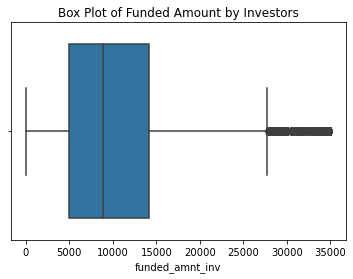

In [183]:
sns.boxplot(loan_df['funded_amnt_inv'])
plt.title('Box Plot of Funded Amount by Investors')
plt.show()

### <font color=green> 6.1.2 Observations

-  <font color=blue>The ***mean*** of the investment amount was found to be ***10289*** and ***median*** was ***8875***. There is a huge difference between the two values. This is due to the presence of multiple outliers as seen from the Box Plot.

## 6.2 Segmented Univariate Analysis of Interest Rates

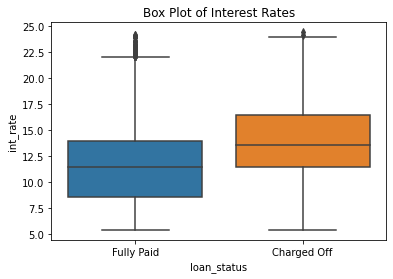

In [184]:
sns.boxplot(loan_df['loan_status'],loan_df['int_rate'])
plt.title('Box Plot of Interest Rates')
plt.show()

### <font color=green>6.2.1 Observation</font>

-  <font color=blue>The spread of interest rates of ***Charged Off*** Loans is significantly higher than that of ***Fully Paid*** Loans.</font>

## 6.3 Segmented Univariate Analysis of Loan Status

In [185]:
loan_df["loan_status"].value_counts()

Fully Paid     32113
Charged Off     5384
Name: loan_status, dtype: int64

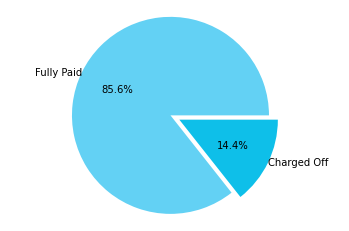

In [186]:
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
fig, ax = plt.subplots()
labels = ['Fully Paid','Charged Off']
explode=(0,0.1)
ax.pie(loan_df["loan_status"].value_counts(), explode=explode, labels=labels,autopct='%1.1f%%',
       colors=color_palette_list[2:4], 
       shadow=False, startangle=0,labeldistance=1.0)
ax.axis('equal')
fig.show()

### <font color=green>6.3.1 Observation

-  <font color=blue>The maximum number of loan status rows in the dataset is ***'Fully Paid'(85.6%)***.
-  The ***'Charged Off'(14.4%)*** rows are 5384 rows on which further analysis will be done.

## 6.4 Segmented Univariate Analysis of Default Rates and Default Loans based on Grade

In [187]:
loan_df['grade'].value_counts()

B    11358
A     9660
C     7657
D     4963
E     2609
F      954
G      296
Name: grade, dtype: int64

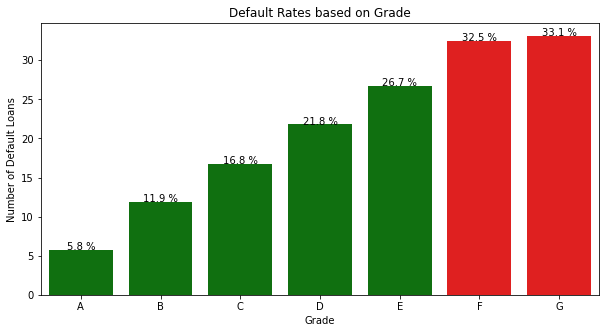

In [188]:
fig = plt.figure(figsize=(10,5))
groupedvalues_sum=loan_df.groupby(['grade'],as_index=False)['Default Score'].sum()
groupedvalues_count=loan_df.groupby(['grade'],as_index=False)['Default Score'].count()
groupedvalues=groupedvalues_sum.merge(groupedvalues_count,how='left',on='grade').reset_index(drop=True)
groupedvalues['Default Score_x']=groupedvalues['Default Score_x'].astype(int)
groupedvalues['Default Score_y']=groupedvalues['Default Score_y'].astype(int)
groupedvalues['Default Rate']=groupedvalues['Default Score_x']*100/groupedvalues['Default Score_y']

clrs = ['green' if (x<30) else 'red' for x in groupedvalues['Default Rate']]
g=sns.barplot(data=groupedvalues,x='grade',y='Default Rate',palette=clrs)
for index, row in groupedvalues.iterrows():
    g.text(row.name,(round(row['Default Rate'],1)), str(str(round(row['Default Rate'],1))+" %"), color='black', ha="center")
plt.title("Default Rates based on Grade")
plt.ylabel('Number of Default Loans')
plt.xlabel('Grade')
plt.show()

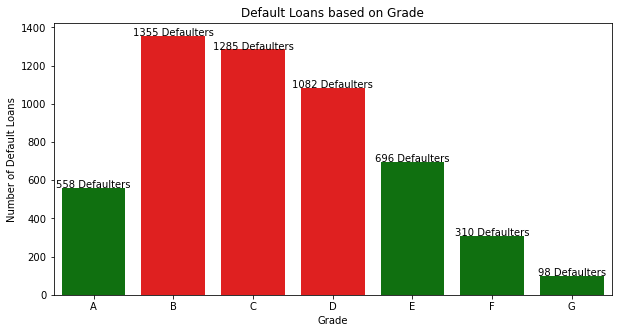

In [189]:
fig = plt.figure(figsize=(10,5))
groupedvalues=default_df.groupby(['grade'],as_index=False)['id'].count()
groupedvalues['id']=groupedvalues['id'].astype(int)
clrs = ['green' if (x<1000) else 'red' for x in groupedvalues['id']]
g=sns.barplot(data=groupedvalues,x='grade',y='id',palette=clrs)
for index, row in groupedvalues.iterrows():
    g.text(row.name,(round(row.id,0)), str(str(round(row.id,0))+" Defaulters"), color='black', ha="center")
plt.title("Default Loans based on Grade")
plt.ylabel('Number of Default Loans')
plt.xlabel('Grade')
plt.show()

### <font color=green>6.4.1 Observation

-  <font color=blue>By comparing the Default Rates based on Grades, it is observed that the Default Rates of ***Grades F*** and ***Grade G*** are the Top 2 Grades with highest Default Rates.
-  But on comparing the number of charged off loans the top 3 grades are:
    -  Grade B (1355)
    -  Grade C (1285)
    -  Grade D (1082)
-  ***Grade A(5.8%)*** has the least default rate compared to its base of ***9660*** datapoints.
-  <font color=red>This is a ***strong predictor*** as max-min of default rates =  33.1-5.8=27.3

## 6.5 Univariate Analysis of Default Loans based on Sub-Grade

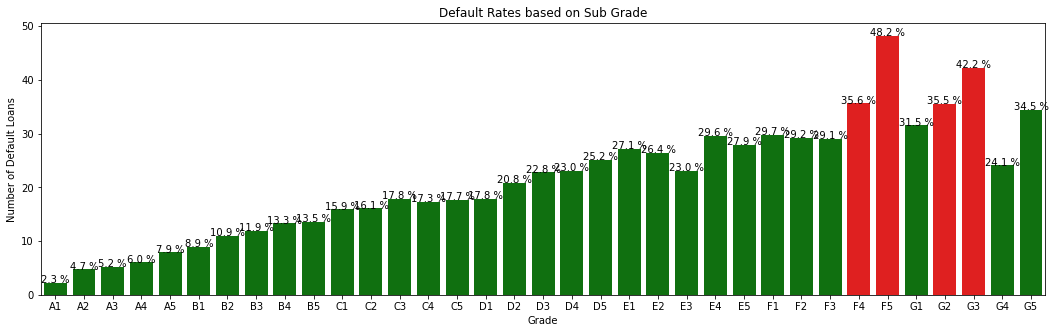

In [190]:
fig = plt.figure(figsize=(18,5))
groupedvalues_sum=loan_df.groupby(['sub_grade'],as_index=False)['Default Score'].sum()
groupedvalues_count=loan_df.groupby(['sub_grade'],as_index=False)['Default Score'].count()
groupedvalues=groupedvalues_sum.merge(groupedvalues_count,how='left',on='sub_grade').reset_index(drop=True)
groupedvalues['Default Score_x']=groupedvalues['Default Score_x'].astype(int)
groupedvalues['Default Score_y']=groupedvalues['Default Score_y'].astype(int)
groupedvalues['Default Rate']=groupedvalues['Default Score_x']*100/groupedvalues['Default Score_y']

clrs = ['green' if (x<35) else 'red' for x in groupedvalues['Default Rate']]
g=sns.barplot(data=groupedvalues,x='sub_grade',y='Default Rate',palette=clrs)
for index, row in groupedvalues.iterrows():
    g.text(row.name,(round(row['Default Rate'],1)), str(str(round(row['Default Rate'],1))+" %"), color='black', ha="center")
plt.title("Default Rates based on Sub Grade")
plt.ylabel('Number of Default Loans')
plt.xlabel('Grade')
plt.show()

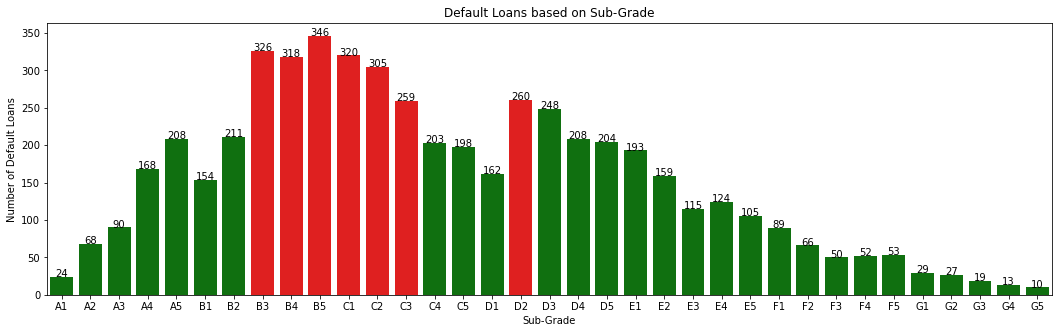

In [191]:
fig = plt.figure(figsize=(18,5))
groupedvalues=default_df.groupby(['sub_grade'],as_index=False)['id'].count()
groupedvalues['id']=groupedvalues['id'].astype(int)
clrs = ['green' if (x<259) else 'red' for x in groupedvalues['id']]
g=sns.barplot(data=groupedvalues,x='sub_grade',y='id',palette=clrs)
for index, row in groupedvalues.iterrows():
    g.text(row.name,(round(row.id,0)), str(str(round(row.id,0))), color='black', ha="center")
plt.title("Default Loans based on Sub-Grade")
plt.ylabel('Number of Default Loans')
plt.xlabel('Sub-Grade')
plt.show()

### <font color=green>6.5.1 Observation

-  <font color=blue> The sub-grades with highest Default Rates are:
    -  ***F4(35.6%), F5(48.2%), G2(35.5%) and G3(42.2%)***
-  The sub-grades with most Default Loans are:
    -  ***B5, B3, C1, B4, C2, C3 and D2***
-  <font color=red>This is a ***strong predictor*** as max-min of default rates =  48.2-2.3=45.9

## 6.6 Univariate Analysis of Default Rate and Default Loans based on Employment Length

In [192]:
loan_df['emp_length'].value_counts()

10+ years    8487
< 1 year     4496
2 years      4286
3 years      4008
4 years      3335
5 years      3190
1 year       3163
6 years      2165
7 years      1708
8 years      1433
9 years      1226
Name: emp_length, dtype: int64

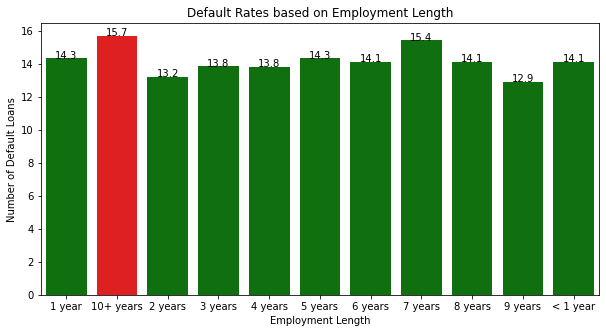

In [193]:
fig = plt.figure(figsize=(10,5))
groupedvalues_sum=loan_df.groupby(['emp_length'],as_index=False)['Default Score'].sum()
groupedvalues_count=loan_df.groupby(['emp_length'],as_index=False)['Default Score'].count()
groupedvalues=groupedvalues_sum.merge(groupedvalues_count,how='left',on='emp_length').reset_index(drop=True)
groupedvalues['Default Score_x']=groupedvalues['Default Score_x'].astype(int)
groupedvalues['Default Score_y']=groupedvalues['Default Score_y'].astype(int)
groupedvalues['Default Rate']=groupedvalues['Default Score_x']*100/groupedvalues['Default Score_y']

clrs = ['green' if (x<15.5) else 'red' for x in groupedvalues['Default Rate']]
g=sns.barplot(data=groupedvalues,x='emp_length',y='Default Rate',palette=clrs)
for index, row in groupedvalues.iterrows():
    g.text(row.name,(round(row['Default Rate'],1)), str(str(round(row['Default Rate'],1))), color='black', ha="center")
plt.title("Default Rates based on Employment Length")
plt.ylabel('Number of Default Loans')
plt.xlabel('Employment Length')
plt.show()

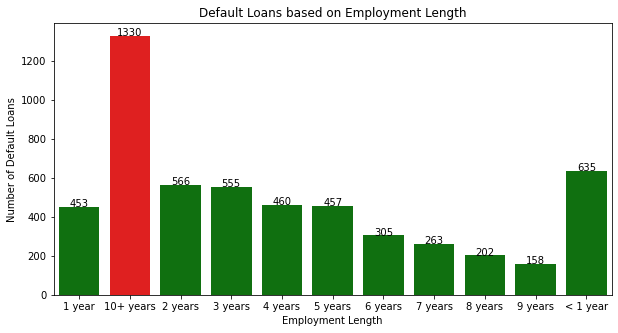

In [194]:
fig = plt.figure(figsize=(10,5))
groupedvalues=default_df.groupby(['emp_length'],as_index=False)['id'].count()
groupedvalues['id']=groupedvalues['id'].astype(int)
clrs = ['green' if (x<1000) else 'red' for x in groupedvalues['id']]
g=sns.barplot(data=groupedvalues,x='emp_length',y='id',palette=clrs)
for index, row in groupedvalues.iterrows():
    g.text(row.name,(round(row.id,0)), str(str(round(row.id,0))), color='black', ha="center")
plt.title("Default Loans based on Employment Length")
plt.ylabel('Number of Default Loans')
plt.xlabel('Employment Length')
plt.show()

### <font color=green> 6.6.1 Observation

-  <font color=blue>On comparing the default rates of all the employment lengths, there is no significant difference between the categories.
-  But on comparing the number of default loans, there is a significantly high number of default loans in cases where the employment length is ***10+ Years***.
-  The defaul rate of ***2 years(13.2%)*** is the lowest even on comparing to its high base of ***4286***.</font>
-  <font color=red>This is ***not a strong predictor*** as max-min of default rates =  15.7-12.9=2.8

## 6.7 Univariate Analysis Default Rate and Default Loans based on Home Ownership

In [195]:
loan_df['home_ownership'].value_counts()

RENT        18047
MORTGAGE    16586
OWN          2765
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

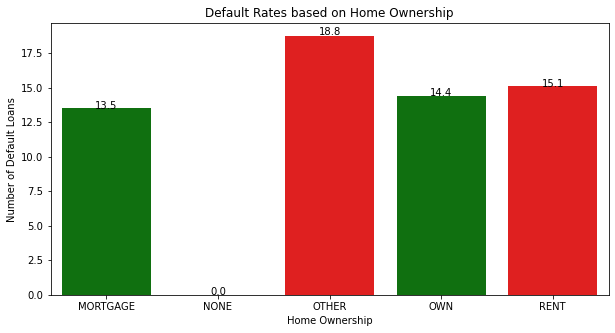

In [196]:
fig = plt.figure(figsize=(10,5))
groupedvalues_sum=loan_df.groupby(['home_ownership'],as_index=False)['Default Score'].sum()
groupedvalues_count=loan_df.groupby(['home_ownership'],as_index=False)['Default Score'].count()
groupedvalues=groupedvalues_sum.merge(groupedvalues_count,how='left',on='home_ownership').reset_index(drop=True)
groupedvalues['Default Score_x']=groupedvalues['Default Score_x'].astype(int)
groupedvalues['Default Score_y']=groupedvalues['Default Score_y'].astype(int)
groupedvalues['Default Rate']=groupedvalues['Default Score_x']*100/groupedvalues['Default Score_y']

clrs = ['green' if (x<15) else 'red' for x in groupedvalues['Default Rate']]
g=sns.barplot(data=groupedvalues,x='home_ownership',y='Default Rate',palette=clrs)
for index, row in groupedvalues.iterrows():
    g.text(row.name,(round(row['Default Rate'],1)), str(str(round(row['Default Rate'],1))), color='black', ha="center")
plt.title("Default Rates based on Home Ownership")
plt.ylabel('Number of Default Loans')
plt.xlabel('Home Ownership')
plt.show()

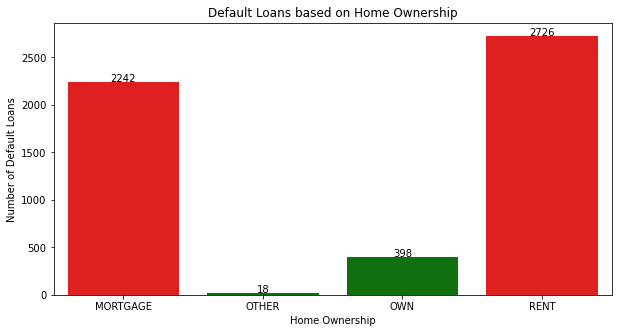

In [197]:
fig = plt.figure(figsize=(10,5))
groupedvalues=default_df.groupby(['home_ownership'],as_index=False)['id'].count()
groupedvalues['id']=groupedvalues['id'].astype(int)
clrs = ['green' if (x<2000) else 'red' for x in groupedvalues['id']]
g=sns.barplot(data=groupedvalues,x='home_ownership',y='id',palette=clrs)
for index, row in groupedvalues.iterrows():
    g.text(row.name,(round(row.id,0)), str(str(round(row.id,0))), color='black', ha="center")
plt.title("Default Loans based on Home Ownership")
plt.ylabel('Number of Default Loans')
plt.xlabel('Home Ownership')
plt.show()

### <font color=green>6.7.1 Observation

-  <font color=blue>On comparing the Default Rates based on Home Ownership it is observed that ***Others*** has the highest default rate and Mortgage, Rent and Own have almost similar Default Rates. But the base of ***Others is only 96***. So the highest bases of datapoints are with ***Rent, Mortgage and Own***.
-  But on comparing the Default Loans there is a significantly high number of defaults from people with Home Ownership as ***Rent*** and ***Mortgage***.
-  It is also observed that ***Own*** home_ownership has a low deafult rate and lowest number of default loans.  
-  <font color=red>This is a ***strong predictor*** as max-min of default rates =  18.8-13.5=5.3    

## 6.8 Univariate Analysis of Default Rate and Default Loans based on Purpose

In [198]:
loan_df['purpose'].value_counts()

debt_consolidation    17664
credit_card            4897
other                  3700
home_improvement       2782
major_purchase         2074
small_business         1709
car                    1446
wedding                 912
medical                 654
moving                  550
house                   354
vacation                347
educational             314
renewable_energy         94
Name: purpose, dtype: int64

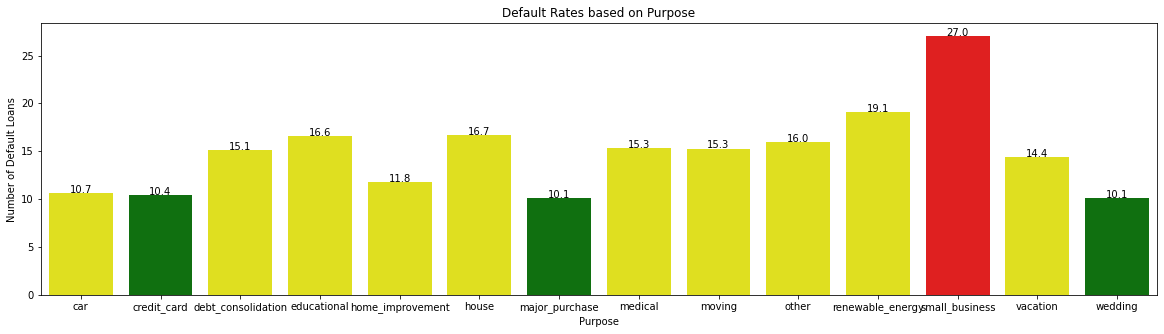

In [199]:
fig = plt.figure(figsize=(20,5))
groupedvalues_sum=loan_df.groupby(['purpose'],as_index=False)['Default Score'].sum()
groupedvalues_count=loan_df.groupby(['purpose'],as_index=False)['Default Score'].count()
groupedvalues=groupedvalues_sum.merge(groupedvalues_count,how='left',on='purpose').reset_index(drop=True)
groupedvalues['Default Score_x']=groupedvalues['Default Score_x'].astype(int)
groupedvalues['Default Score_y']=groupedvalues['Default Score_y'].astype(int)
groupedvalues['Default Rate']=groupedvalues['Default Score_x']*100/groupedvalues['Default Score_y']

clrs = ['green' if (x<10.5) else 'yellow' if (x<20) else 'red' for x in groupedvalues['Default Rate']]
g=sns.barplot(data=groupedvalues,x='purpose',y='Default Rate',palette=clrs)
for index, row in groupedvalues.iterrows():
    g.text(row.name,(round(row['Default Rate'],1)), str(str(round(row['Default Rate'],1))), color='black', ha="center")
plt.title("Default Rates based on Purpose")
plt.ylabel('Number of Default Loans')
plt.xlabel('Purpose')
plt.show()

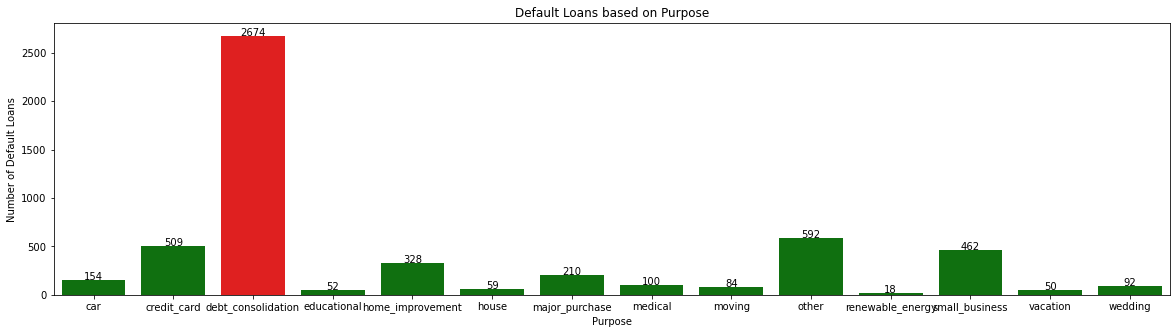

In [200]:
fig = plt.figure(figsize=(20,5))
groupedvalues=default_df.groupby(['purpose'],as_index=False)['id'].count()
groupedvalues['id']=groupedvalues['id'].astype(int)
clrs = ['green' if (x<2000) else 'red' for x in groupedvalues['id']]
g=sns.barplot(data=groupedvalues,x='purpose',y='id',palette=clrs)
for index, row in groupedvalues.iterrows():
    g.text(row.name,(round(row.id,0)), str(str(round(row.id,0))), color='black', ha="center")
plt.title("Default Loans based on Purpose")
plt.ylabel('Number of Default Loans')
plt.xlabel('Purpose')
plt.show()

### <font color=green> 6.8.1 Observation

-  <font color=blue> On comparing the Default Rates of various ***purpose*** it is observed that the ***small_business*** has a significantly high default rate. 
-  On comparing the number of default loans it is observed that there is very high number of default loans***(2674)*** where the Purpose is ***debt_consolidation***.
-  It is also observed that ***major_purchase***, ***credit_card*** and ***wedding*** have very low default rates.
-  <font color=red>This is a ***strong predictor*** as max-min of default rates =  27.0-10.1=16.9

## 6.9 Univariate Analysis of Default Rate and Default Loans based on State

In [201]:
loan_df['addr_state'].value_counts().sort_values(ascending=False).head(10)

CA    6761
NY    3598
FL    2693
TX    2601
NJ    1763
IL    1441
PA    1433
VA    1339
GA    1319
MA    1267
Name: addr_state, dtype: int64

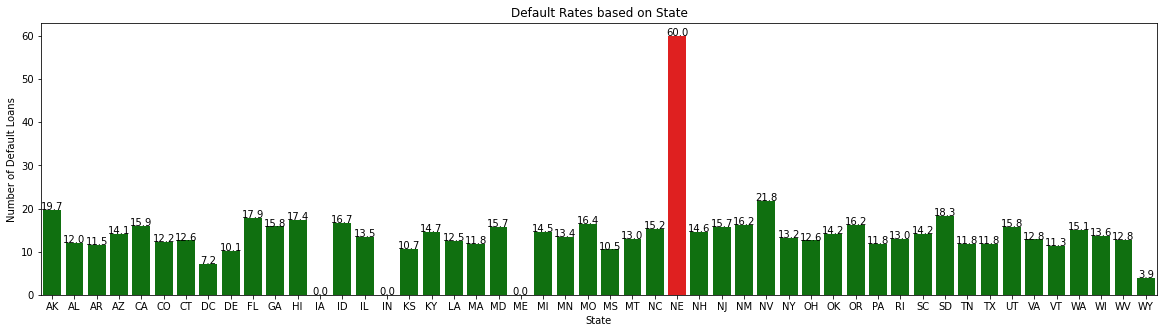

In [202]:
fig = plt.figure(figsize=(20,5))
groupedvalues_sum=loan_df.groupby(['addr_state'],as_index=False)['Default Score'].sum()
groupedvalues_count=loan_df.groupby(['addr_state'],as_index=False)['Default Score'].count()
groupedvalues=groupedvalues_sum.merge(groupedvalues_count,how='left',on='addr_state').reset_index(drop=True)
groupedvalues['Default Score_x']=groupedvalues['Default Score_x'].astype(int)
groupedvalues['Default Score_y']=groupedvalues['Default Score_y'].astype(int)
groupedvalues['Default Rate']=groupedvalues['Default Score_x']*100/groupedvalues['Default Score_y']

clrs = ['green' if (x<40) else 'red' for x in groupedvalues['Default Rate']]
g=sns.barplot(data=groupedvalues,x='addr_state',y='Default Rate',palette=clrs)
for index, row in groupedvalues.iterrows():
    g.text(row.name,(round(row['Default Rate'],1)), str(str(round(row['Default Rate'],1))), color='black', ha="center")
plt.title("Default Rates based on State")
plt.ylabel('Number of Default Loans')
plt.xlabel('State')
plt.show()

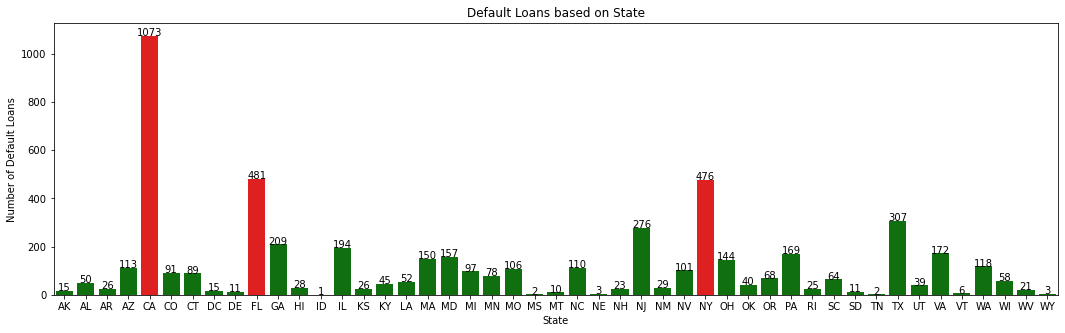

In [203]:
fig = plt.figure(figsize=(18,5))
groupedvalues=default_df.groupby(['addr_state'],as_index=False)['id'].count()
groupedvalues['id']=groupedvalues['id'].astype(int)
clrs = ['green' if (x<400) else 'red' for x in groupedvalues['id']]
g=sns.barplot(data=groupedvalues,x='addr_state',y='id',palette=clrs)
for index, row in groupedvalues.iterrows():
    g.text(row.name,(round(row.id,0)), str(str(round(row.id,0))), color='black', ha="center")
plt.title("Default Loans based on State")
plt.ylabel('Number of Default Loans')
plt.xlabel('State')
plt.show()

### <font color=green> 6.9.1 Observation

-  <font color=blue>By observing the Default Rates based on state, it is observed that ***NE*** has the highest default rate. But its base is only 5 datapoints. So that can be ignored.
-  On looking at the number of Defaul Loans it is observed that the number of Default loans from ***CA(1073)*** is significantly higher than that of any other ***State***. Also ***FL(481) and NY(476)*** have high number of default loans.
-  <font color=red>This is a ***strong predictor*** as max-min of default rates =  60.0-0.0=60.0

## 6.10 Univariate Analysis of Deafult Loans based on Terms

In [204]:
default_df.term.value_counts()

 36 months    3061
 60 months    2323
Name: term, dtype: int64

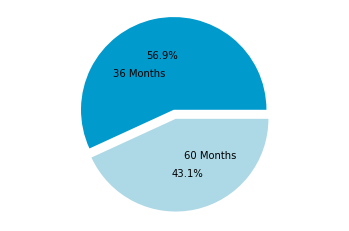

In [205]:
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
fig, ax = plt.subplots()
labels = ['36 Months', 
         '60 Months']
explode=(0.1,0)
ax.pie(default_df.term.value_counts(), explode=explode, labels=labels,autopct='%1.1f%%',
       colors=color_palette_list[0:2], 
       shadow=False, startangle=0,labeldistance=0.4)
ax.axis('equal')
fig.show()

### <font color=green> 6.10.1 Observation

-  <font color=blue> The number of default loans where the term is ***36 months(3061 - 57%)*** is higher than that of ***60 months(2323 - 43%)***.
-  <font color=red>This is a ***strong predictor*** as max-min of default rates =  56.9-43.1=13.8    

## 6.11 Histogram of Interest Rates of Default Loans

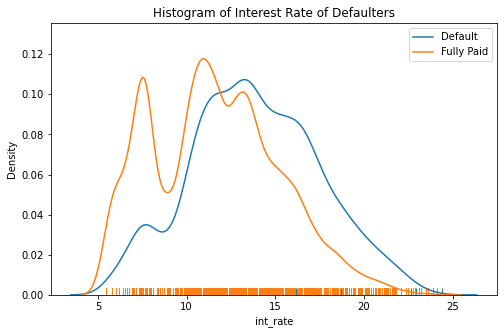

In [206]:
plt.figure(figsize=[8,5])
sns.distplot(default_df['int_rate'], hist=False, rug=True)
sns.distplot(paid_df['int_rate'], hist=False, rug=True)
plt.title('Histogram of Interest Rate of Defaulters')
labels=['Default','Fully Paid']
plt.legend(labels=labels)
plt.show()

### <font color=green>6.11.1 Observation

-  <font color=blue>From the histogram it is observed that the highest density of ***interest rates*** for the ***Default Loans*** lie between ***10% and 18%***.
-  <font color=blue>Also it is observed that the highest density of ***interest rates*** for the ***Fully Paid*** Loans lie between ***8% and 14%***.

## 6.12 Univariate Analysis of Interest Rate Categories

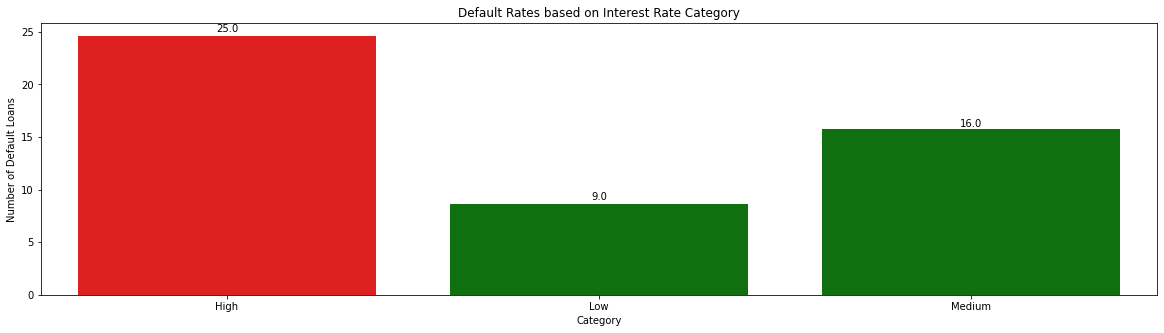

In [207]:
fig = plt.figure(figsize=(20,5))
groupedvalues_sum=loan_df.groupby(['int_rate_cat'],as_index=False)['Default Score'].sum()
groupedvalues_count=loan_df.groupby(['int_rate_cat'],as_index=False)['Default Score'].count()
groupedvalues=groupedvalues_sum.merge(groupedvalues_count,how='left',on='int_rate_cat').reset_index(drop=True)
groupedvalues['Default Score_x']=groupedvalues['Default Score_x'].astype(int)
groupedvalues['Default Score_y']=groupedvalues['Default Score_y'].astype(int)
groupedvalues['Default Rate']=groupedvalues['Default Score_x']*100/groupedvalues['Default Score_y']

clrs = ['green' if (x<20) else 'red' for x in groupedvalues['Default Rate']]
g=sns.barplot(data=groupedvalues,x='int_rate_cat',y='Default Rate',palette=clrs)
for index, row in groupedvalues.iterrows():
    g.text(row.name,(round(row['Default Rate'],0)), str(str(round(row['Default Rate'],0))), color='black', ha="center")
plt.title("Default Rates based on Interest Rate Category")
plt.ylabel('Number of Default Loans')
plt.xlabel('Category')
plt.show()

### <font color=green>6.12.1 Observation

-  <font color=blue>The default rate of Investment Rate Category ***High(>14.82%)*** is higher compared to ***Low(<11.83%)*** and ***Medium(11.83-14.42%)***.
-  <font color=red>This is a ***strong predictor*** as max-min of default rates =  25.0-9.0=16.0

## 6.13 Histogram of Installment Amount of Default Loans

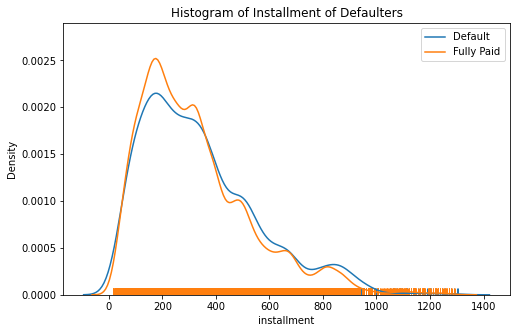

In [208]:
plt.figure(figsize=[8,5])
sns.distplot(default_df['installment'], hist=False, rug=True)
sns.distplot(paid_df['installment'], hist=False, rug=True)
plt.title('Histogram of Installment of Defaulters')
labels=['Default','Fully Paid']
plt.legend(labels=labels)
plt.show()

### <font color=green>6.13.1 Observation

-  <font color=blue>From the histogram it is observed that the highest density of ***Installment Amount*** of both types of loans lie between ***100 and 400***.

## 6.14 Univariate Analysis of Interest Amount Categories

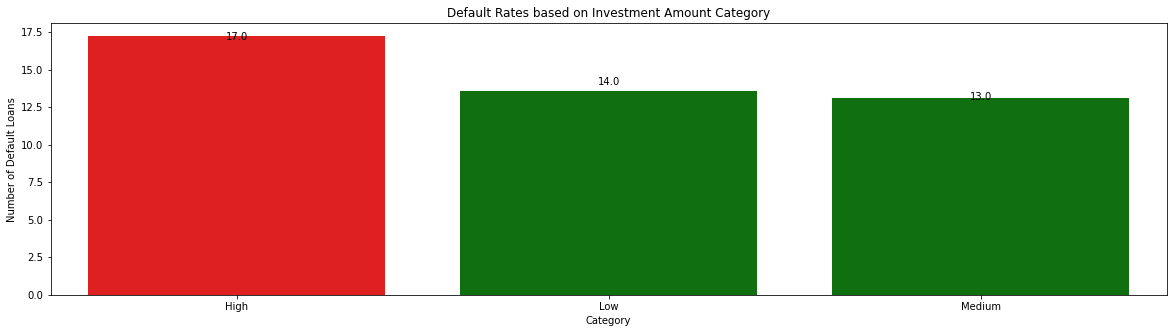

In [209]:
fig = plt.figure(figsize=(20,5))
groupedvalues_sum=loan_df.groupby(['inv_amnt_cat'],as_index=False)['Default Score'].sum()
groupedvalues_count=loan_df.groupby(['inv_amnt_cat'],as_index=False)['Default Score'].count()
groupedvalues=groupedvalues_sum.merge(groupedvalues_count,how='left',on='inv_amnt_cat').reset_index(drop=True)
groupedvalues['Default Score_x']=groupedvalues['Default Score_x'].astype(int)
groupedvalues['Default Score_y']=groupedvalues['Default Score_y'].astype(int)
groupedvalues['Default Rate']=groupedvalues['Default Score_x']*100/groupedvalues['Default Score_y']

clrs = ['green' if (x<15) else 'red' for x in groupedvalues['Default Rate']]
g=sns.barplot(data=groupedvalues,x='inv_amnt_cat',y='Default Rate',palette=clrs)
for index, row in groupedvalues.iterrows():
    g.text(row.name,(round(row['Default Rate'],0)), str(str(round(row['Default Rate'],0))), color='black', ha="center")
plt.title("Default Rates based on Investment Amount Category")
plt.ylabel('Number of Default Loans')
plt.xlabel('Category')
plt.show()

### <font color=green>6.14.1 Observation

-  <font color=blue>The default rate of Investment Amount Category ***High(>14100)*** is higher than ***Low(<8875)*** and ***Medium(8875-14100)***.
-  <font color=red>This is ***not a strong predictor*** as max-min of default rates =  17.0-13.0=4.0

## 6.15 Univariate Analysis on Verification Status

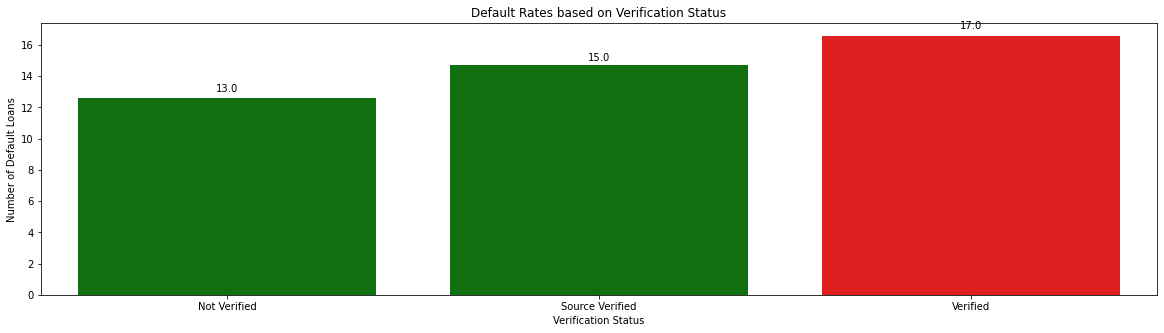

In [210]:
fig = plt.figure(figsize=(20,5))
groupedvalues_sum=loan_df.groupby(['verification_status'],as_index=False)['Default Score'].sum()
groupedvalues_count=loan_df.groupby(['verification_status'],as_index=False)['Default Score'].count()
groupedvalues=groupedvalues_sum.merge(groupedvalues_count,how='left',on='verification_status').reset_index(drop=True)
groupedvalues['Default Score_x']=groupedvalues['Default Score_x'].astype(int)
groupedvalues['Default Score_y']=groupedvalues['Default Score_y'].astype(int)
groupedvalues['Default Rate']=groupedvalues['Default Score_x']*100/groupedvalues['Default Score_y']

clrs = ['green' if (x<16) else 'red' for x in groupedvalues['Default Rate']]
g=sns.barplot(data=groupedvalues,x='verification_status',y='Default Rate',palette=clrs)
for index, row in groupedvalues.iterrows():
    g.text(row.name,(round(row['Default Rate'],0)), str(str(round(row['Default Rate'],0))), color='black', ha="center")
plt.title("Default Rates based on Verification Status")
plt.ylabel('Number of Default Loans')
plt.xlabel('Verification Status')
plt.show()

### <font color=green>6.15.1 Observation

-  <font color=blue> The default rates of verification status ***Verified*** is higher compared to the other two.
-  <font color=red>This is ***not a strong predictor*** as max-min of default rates =  17.0-13.0=4.0

## 6.16 Univariate Analysis on DTI

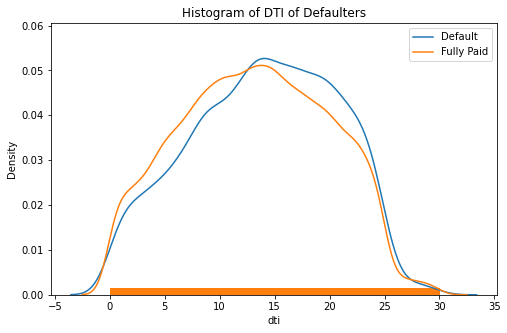

In [211]:
plt.figure(figsize=[8,5])
sns.distplot(default_df['dti'], hist=False, rug=True)
sns.distplot(paid_df['dti'], hist=False, rug=True)
plt.title('Histogram of DTI of Defaulters')
labels=['Default','Fully Paid']
plt.legend(labels=labels)
plt.show()

### 6.16.1 Observation

-  <font color=blue>The DTI of both Fully Paid and Default Loans are highly dense near 13-15.

## 6.17 Univariate Analysis of Annual Income

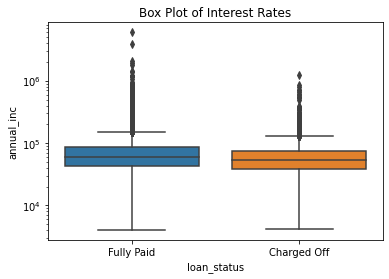

In [212]:
sns.boxplot(loan_df['loan_status'],loan_df['annual_inc'])
plt.yscale('log')
plt.title('Box Plot of Interest Rates')
plt.show()

In [213]:
default_df['annual_inc'].describe()

count    5.384000e+03
mean     6.341500e+04
std      4.813606e+04
min      4.080000e+03
25%      3.840000e+04
50%      5.400000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64

In [214]:
paid_df['annual_inc'].describe()

count    3.211300e+04
mean     7.044608e+04
std      6.699410e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.499600e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

## <font color=green>6.17.1 Observation

-  <font color=blue>By observing the box plot it was observed that the mean value is affected by the presence of outliers for both Fully Paid Loans and Default Loans.
-  Hence the median value gives a better picture and there is a significant difference between the medians of ***Fully Paid(60000)*** and ***Default(54000)*** Loans.

## 6.18 Time Series Chart of Issue Dates

In [215]:
loan_df2=loan_df.copy()
loan_df2['issue_d']=loan_df2['issue_d'].apply(lambda x: datetime.strptime(x,'%b-%y'))
loan_df2['value']=1
loan_df2=loan_df2.groupby(['issue_d','loan_status'],as_index=False)['value'].sum()
loan_df3=pd.pivot_table(loan_df2, values = 'value', index=['issue_d'], columns = 'loan_status').reset_index()
loan_df3=loan_df3.fillna(0)
loan_df3=loan_df3.groupby(['issue_d'],as_index=False)['Charged Off','Fully Paid'].sum()
fig=px.line(loan_df3,x='issue_d',y=['Charged Off','Fully Paid'])
fig.show()

### <font color=green>6.18.1 Observation</font>

-  <font color=blue>The number of loans is increasing and has taken a huge spike in Jul 2011.</font>

# <font color=red>7. Identified Driver Variables from Analysis

-  <font color=blue>From the above analysis and based on the commented observations, the following variables were found to be strong drivers of default loans:
    -  Home Ownership
    -  Interest Rate
    -  Term
    -  State
    -  Purpose
    -  Grade
    -  Sub-Grade

# <font color=red>8. Bivariate Analysis</font>

## 8.1 Bivariate Analysis - Scatter Plot of Interest Rate and Loan Amount for Loan Status

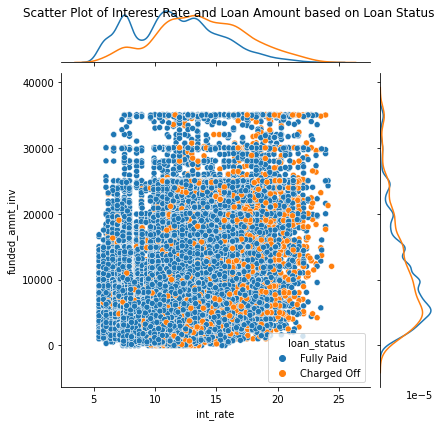

In [216]:
grid = sns.JointGrid(x='int_rate', y='funded_amnt_inv', data=loan_df)
g = grid.plot_joint(sns.scatterplot, hue='loan_status', data=loan_df)
sns.kdeplot(loan_df.loc[loan_df['loan_status']=='Fully Paid', 'int_rate'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(loan_df.loc[loan_df['loan_status']=='Charged Off', 'int_rate'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(loan_df.loc[loan_df['loan_status']=='Fully Paid', 'funded_amnt_inv'], ax=g.ax_marg_y, vertical=True, legend=False)
sns.kdeplot(loan_df.loc[loan_df['loan_status']=='Charged Off', 'funded_amnt_inv'], ax=g.ax_marg_y, vertical=True, legend=False)
g.fig.suptitle('Scatter Plot of Interest Rate and Loan Amount based on Loan Status')
plt.show()

### <font color=green>8.1.1 Observation

-  <font color=blue>From the scatter plot it is observed that ***Interest Rate of Charged Off*** loans are offset to ***10% - 18%***.
-  The ***Loan amount*** is spread evenly for both ***Charged Off and Fully Paid*** loans.

## 8.2 Bivariate Analysis - Scatter Plot of Interest Rate and Loan Amount for Grades

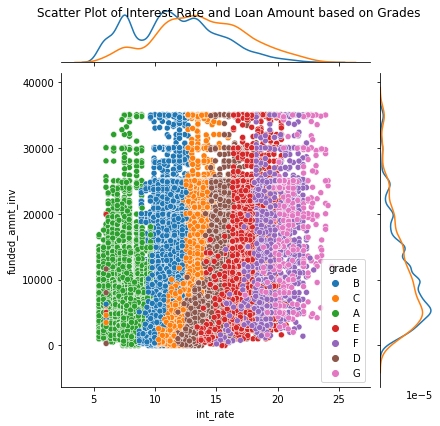

In [217]:
grid = sns.JointGrid(x='int_rate', y='funded_amnt_inv', data=loan_df)
g = grid.plot_joint(sns.scatterplot, hue='grade', data=loan_df)
sns.kdeplot(loan_df.loc[loan_df['loan_status']=='Fully Paid', 'int_rate'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(loan_df.loc[loan_df['loan_status']=='Charged Off', 'int_rate'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(loan_df.loc[loan_df['loan_status']=='Fully Paid', 'funded_amnt_inv'], ax=g.ax_marg_y, vertical=True, legend=False)
sns.kdeplot(loan_df.loc[loan_df['loan_status']=='Charged Off', 'funded_amnt_inv'], ax=g.ax_marg_y, vertical=True, legend=False)
g.fig.suptitle('Scatter Plot of Interest Rate and Loan Amount based on Grades')
plt.show()

### <font color=green>8.2.1 Observation

-  <font color=blue>This scatter plot was used to observe the spread of different grades wrt interest rate and funded amount of investors.

## 8.3 Heatmap to identify correlation

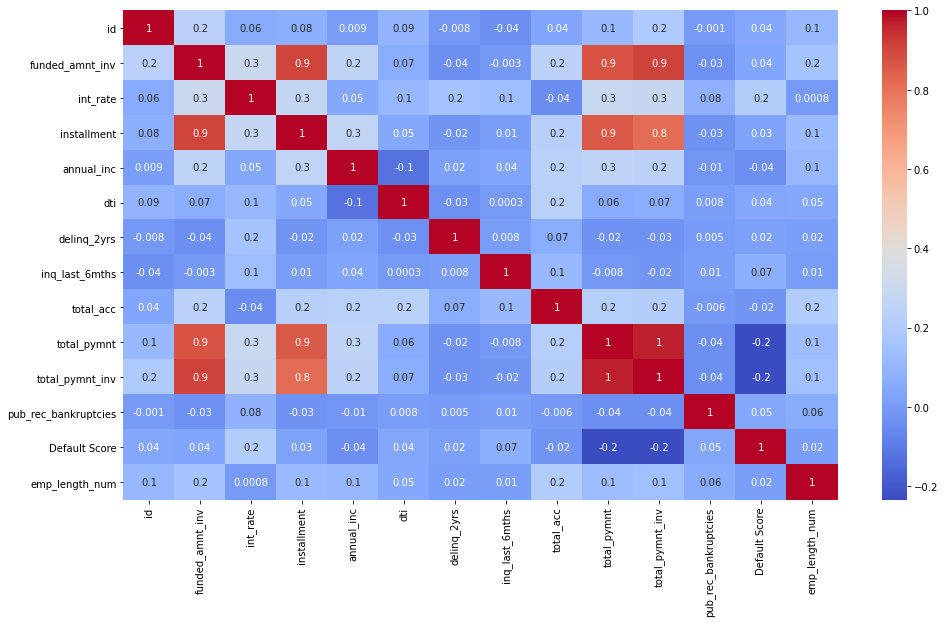

In [218]:
plt.figure(figsize = (16,9))
sns.heatmap(loan_df.corr(), annot = True, fmt='.1g',cmap= 'coolwarm')
plt.show()

### <font color=green>8.3.1 Observation

-  <font color=blue>No abnormal correlations were identified.

## 8.4 Bivariate Analysis of Term and Grade

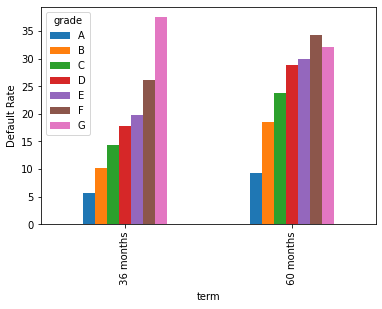

In [220]:
groupedvalues_sum=loan_df.groupby(['term','grade'],as_index=False)['Default Score'].sum()
groupedvalues_count=loan_df.groupby(['term','grade'],as_index=False)['Default Score'].count()
groupedvalues=groupedvalues_sum.merge(groupedvalues_count,how='left',on=['term','grade']).reset_index(drop=True)
groupedvalues['Default Score_x']=groupedvalues['Default Score_x'].astype(int)
groupedvalues['Default Score_y']=groupedvalues['Default Score_y'].astype(int)
groupedvalues['Default Rate']=groupedvalues['Default Score_x']*100/groupedvalues['Default Score_y']

df_pivot = pd.pivot_table(groupedvalues,values="Default Rate",index="term",columns="grade")

ax = df_pivot.plot(kind="bar")
ax.set_ylabel("Default Rate")
plt.show()

### <font color=green>8.4.1 Observation

-  <font color=blue> It is observed that the Default Rate of ***36 month*** term is significantly lower for all grades except G.

# <font color=red>END OF ANALYSIS